# West Nile Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,  AdaBoostClassifier
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



/Users/samlundberg/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/samlundberg/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('./data/trainw.csv')
test  = pd.read_csv('./data/testw.csv')
train.columns = [col.lower().replace(' ', '_') for col in train.columns]
test.columns = [col.lower().replace(' ', '_') for col in test.columns]


#read cleaned data and bring and trainform all variables to lower_camel_case
                    

In [3]:
train.isnull().sum() 


unnamed:_0                             0
index                                  0
date                                   0
address                                0
block                                  0
street                                 0
trap                                   0
addressnumberandstreet                 0
latitude                               0
longitude                              0
addressaccuracy                        0
nummosquitos                           0
wnvpresent                             0
year                                   0
month                                  0
day                                    0
tmax_x                                 0
tmin_x                                 0
tavg_x                                 0
depart_x                               0
dewpoint_x                             0
wetbulb_x                              0
heat_x                                 0
cool_x                                 0
sunrise_x       

In [4]:
train.columns[50:70]

Index(['preciptotal_y', 'stnpressure_y', 'sealevel_y', 'resultspeed_y',
       'resultdir_y', 'avgspeed_y', 'temp_min_both', 'temp_max_both',
       'temp_avg_both', 'temp_dew_point_both', 'temp_wet_bulb_both',
       'stnpressure_both', 'ht_cool_both', 'temp_min_both1', 'temp_min_both2',
       'temp_min_both4', 'temp_min_both7', 'temp_min_both10',
       'temp_min_both14', 'temp_max_both1'],
      dtype='object')

In [5]:
train['month_year'] = train['month'] * (train['year'] - 2007)
test['month_year'] = test['month'] * (test['year'] - 2007)

In [6]:
#Found by running ada boost feature importance-these had a score above 0
features=[  'distance', 'year', 'month_year',
       'latitude', 'sunrise_x', 'distance_5', 
       'resultspeed_y', 'trap', 'street', 'trap_and_temp_x',
       'dist_species_culex_pipiens/restuans', 
       'sealevel_x', 'longitude', 'block_and_precip_x',
       'species_culex_territans', 'dist_species_culex_pipiens',
       'depart_x',  'tmin_x', 'tmax_x', 'tmax_y','tmin_y',
       'month_dist_3_temp_x','month_dist_5_temp_x',
       'temp_min_both', 'temp_max_both',
       'temp_avg_both', 'temp_dew_point_both', 'temp_wet_bulb_both',
       'stnpressure_both', 'ht_cool_both', 'temp_min_both1', 'temp_min_both2',
       'temp_min_both4', 'temp_min_both7', 'temp_min_both10',
       'temp_min_both14', 'temp_max_both1','temp_max_both2', 'temp_max_both4', 'temp_max_both7', 
       'temp_max_both10',
       'temp_max_both14', 'temp_dew_point_both1', 'temp_dew_point_both2',
       'temp_dew_point_both4', 'temp_dew_point_both7',
       'temp_dew_point_both10'
       ]



X = train[features]
y = train['wnvpresent']

In [7]:
train.columns[70:80]

Index(['temp_max_both2', 'temp_max_both4', 'temp_max_both7', 'temp_max_both10',
       'temp_max_both14', 'temp_dew_point_both1', 'temp_dew_point_both2',
       'temp_dew_point_both4', 'temp_dew_point_both7',
       'temp_dew_point_both10'],
      dtype='object')

In [8]:
#do a train test split with stratified data due to unbalanced classes

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y)

#### Dealing with unbalanced classes

We have unbalanced classes in our data set with only about 5.24% of our observations containing the West Nile Virus.  In order to better predict the minority class which is the class of interest we are oversampling the data where West Nile is present in our training data.  We leave the testing data untouched.

In [9]:
#merging the target variable back onto the training data in order to sample off its value

datasets = (X_train, y_train)
traincombined = pd.concat(datasets, axis = 1)
traincombined.head()

,distance,year,month_year,latitude,sunrise_x,distance_5,resultspeed_y,trap,street,trap_and_temp_x,...,temp_max_both4,temp_max_both7,temp_max_both10,temp_max_both14,temp_dew_point_both1,temp_dew_point_both2,temp_dew_point_both4,temp_dew_point_both7,temp_dew_point_both10,wnvpresent
70,0.680102,2007.0,0.0,41.958271,417,1.679011,6.2,90,41,5760,...,85,88,88,89,57,60,63,63,63,0.0
7447,2.384295,2013.0,48.0,41.957799,445,2.384295,6.2,134,131,10854,...,76,81,88,96,63,63,63,63,65,0.0
4240,2.384295,2009.0,16.0,41.957799,512,6.970312,10.7,134,131,8978,...,82,82,83,89,63,63,63,63,68,0.0
8059,1.387414,2013.0,54.0,41.801498,522,1.726628,4.3,22,58,1892,...,84,96,96,96,53,56,60,67,69,0.0
8309,0.939177,2013.0,54.0,41.916265,536,0.939177,7.8,95,0,7980,...,81,82,95,95,59,59,59,59,69,0.0


In [10]:
#Select West nile cases and generate 5000 samples
west_nile = traincombined[traincombined.wnvpresent == 1]
extra_west_nile = west_nile.sample(n = 4000, 
                                   replace = True,
                                   random_state = 30,
                                   axis = 0)

In [11]:
#merge samples onto original data
merge = [traincombined, extra_west_nile]
trainmerged = pd.concat(merge, axis = 0)

In [12]:
#Break our training data back into a X and a y
X_train = trainmerged[features]
y_train = trainmerged['wnvpresent']

### Set up our model for grid search evaluation

In [13]:
ad = AdaBoostClassifier()
sd_params = {
    'n_estimators'       : [50, 75, 100],
    'learning_rate'          : [.1, .2, .3]
   }



In [14]:
gs = GridSearchCV(ad, 
                  param_grid=sd_params,
                 scoring = 'recall',
                  cv = 4)


In [15]:
%%time
gs.fit(X_train, y_train)
print("Print Train Score : " , gs.best_score_)
print("Print Test Score  : " , gs.score(X_test, y_test))
print("Print Best Params : " , gs.best_params_)

Print Train Score :  0.804065956848632
Print Test Score  :  0.7956989247311828
Print Best Params :  {'learning_rate': 0.3, 'n_estimators': 100}
CPU times: user 24.7 s, sys: 32.4 ms, total: 24.7 s
Wall time: 24.2 s


In [16]:
y_hat = gs.predict(X_test)
y_hat_train = gs.predict(X_train)
y_hat_prob = gs.predict_proba(X_test)


In [17]:
ad1= AdaBoostClassifier(n_estimators= 150, learning_rate=.3)
ad1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=150, random_state=None)

In [18]:
ad1.feature_importances_

array([0.03333333, 0.00666667, 0.02666667, 0.06666667, 0.11333333,
       0.1       , 0.01333333, 0.01333333, 0.04      , 0.04666667,
       0.06      , 0.03333333, 0.06666667, 0.01333333, 0.00666667,
       0.05333333, 0.        , 0.00666667, 0.00666667, 0.        ,
       0.        , 0.03333333, 0.09333333, 0.        , 0.00666667,
       0.01333333, 0.        , 0.00666667, 0.00666667, 0.        ,
       0.00666667, 0.        , 0.        , 0.        , 0.        ,
       0.02      , 0.        , 0.        , 0.        , 0.00666667,
       0.02666667, 0.01333333, 0.00666667, 0.        , 0.01333333,
       0.01333333, 0.02666667])

In [19]:
# View Feature Importance from ADA Boost model
raw_data={'ADA Imp':ad1.feature_importances_}
ada2_df=pd.DataFrame(raw_data,train[features].columns)
ada2_df=ada2_df.sort_values('ADA Imp', ascending=False) 
ada2_df

,ADA Imp
sunrise_x,0.113333
distance_5,0.100000
month_dist_5_temp_x,0.093333
latitude,0.066667
longitude,0.066667
dist_species_culex_pipiens/restuans,0.060000
dist_species_culex_pipiens,0.053333
trap_and_temp_x,0.046667
street,0.040000
distance,0.033333


In [20]:
ada2_df=ada2_df.loc[ada2_df['ADA Imp'] != 0]
ada2_df.loc[ada2_df['ADA Imp'] != 0]

,ADA Imp
sunrise_x,0.113333
distance_5,0.100000
month_dist_5_temp_x,0.093333
latitude,0.066667
longitude,0.066667
dist_species_culex_pipiens/restuans,0.060000
dist_species_culex_pipiens,0.053333
trap_and_temp_x,0.046667
street,0.040000
distance,0.033333


In [21]:
print(classification_report( y_train, y_hat_train))

             precision    recall  f1-score   support

        0.0       0.86      0.80      0.83      6079
        1.0       0.74      0.81      0.77      4277

avg / total       0.81      0.80      0.80     10356



In [22]:
print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

        0.0       0.99      0.80      0.88      2026
        1.0       0.15      0.80      0.26        93

avg / total       0.95      0.80      0.86      2119



In [23]:
confusion_matrix(y_train, y_hat_train)

array([[4838, 1241],
       [ 794, 3483]])

In [24]:
confusion_matrix(y_test, y_hat)

array([[1622,  404],
       [  19,   74]])

In [25]:
y_test.value_counts()

0.0    2026
1.0      93
Name: wnvpresent, dtype: int64

In [49]:
# Test Specificity
1622/(1622+404)

0.8005923000987167

In [26]:
X = test[features]
predict = (gs.predict(X))
predprob = gs.predict_proba(X)

In [27]:
predprob

array([[0.61322219, 0.38677781],
       [0.61529068, 0.38470932],
       [0.61140174, 0.38859826],
       ...,
       [0.51092421, 0.48907579],
       [0.51092421, 0.48907579],
       [0.51092421, 0.48907579]])

In [28]:
y_train_pred_proba = gs.predict_proba(X_train)
y_train_pred = gs.predict(X_train)
y_test_pred_proba = gs.predict_proba(X_test)
y_test_pred = gs.predict(X_test)

In [29]:
#modifying train and testing data to allow for changing prob thresholds and printing the 
#roc curves
X_train.loc[:, 'actual_y'] = y_train
X_train.loc[:, 'predicted_label'] = y_train_pred
X_train.loc[:, 'predicted_proba'] = y_train_pred_proba[:, 1]


In [30]:
X_test.loc[:, 'actual_y'] = y_test
X_test.loc[:, 'predicted_label'] = y_test_pred
X_test.loc[:, 'predicted_proba'] = y_test_pred_proba[:, 1]


In [31]:
mask_misclassification = (X_test[X_test['predicted_label'] == 0])
misclassifications = (mask_misclassification[mask_misclassification['actual_y'] == 1])
misclassifications_df = pd.DataFrame(misclassifications)

In [32]:
misclassifications_df.to_csv('./data/misclassifications.csv', index = False)

In [33]:
#print out confusion matrices from .1 .5 by .02 for Xtest and Xtrain
for prob in range(490, 500, 1):
    proba = prob/1000
    
    X_test.loc[:, 'predicted_label']= X_test['predicted_proba'].map(
    lambda p: 1 if p > proba else 0)
    
    X_train.loc[:, 'predicted_label']= X_train['predicted_proba'].map(
    lambda p: 1 if p > proba else 0)
    
    X_test['predicted_label']
    print('Test  ' + str(proba))
    print(confusion_matrix(y_test, X_test['predicted_label']))
    print(' Train  ' + str(proba))
    print(confusion_matrix(y_train, X_train['predicted_label']))


Test  0.49
[[1205  821]
 [   8   85]]
 Train  0.49
[[3573 2506]
 [ 140 4137]]
Test  0.491
[[1246  780]
 [   8   85]]
 Train  0.491
[[3694 2385]
 [ 157 4120]]
Test  0.492
[[1294  732]
 [   9   84]]
 Train  0.492
[[3827 2252]
 [ 179 4098]]
Test  0.493
[[1340  686]
 [   9   84]]
 Train  0.493
[[3946 2133]
 [ 247 4030]]
Test  0.494
[[1381  645]
 [   9   84]]
 Train  0.494
[[4081 1998]
 [ 313 3964]]
Test  0.495
[[1432  594]
 [   9   84]]
 Train  0.495
[[4229 1850]
 [ 444 3833]]
Test  0.496
[[1471  555]
 [  10   83]]
 Train  0.496
[[4363 1716]
 [ 461 3816]]
Test  0.497
[[1503  523]
 [  11   82]]
 Train  0.497
[[4483 1596]
 [ 564 3713]]
Test  0.498
[[1545  481]
 [  15   78]]
 Train  0.498
[[4599 1480]
 [ 580 3697]]
Test  0.499
[[1582  444]
 [  17   76]]
 Train  0.499
[[4728 1351]
 [ 662 3615]]


In [34]:
fpr, tpr, _ = roc_curve(y_train, X_train['predicted_proba'])
roc_auc = auc(fpr, tpr)


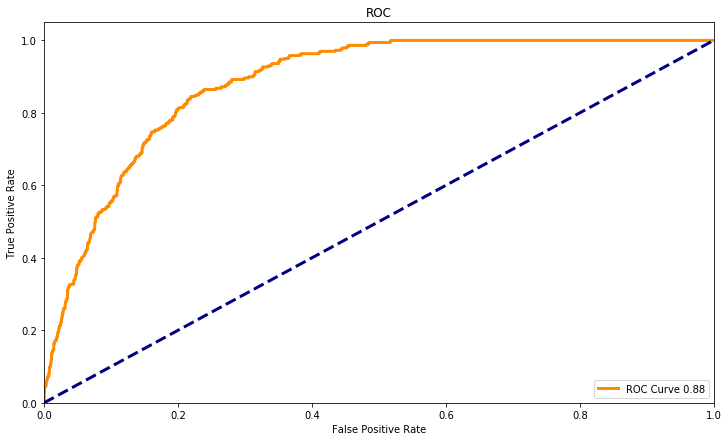

In [35]:
# Plot 
plt.figure(figsize = (12,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [36]:
fpr, tpr, _ = roc_curve(y_test, X_test['predicted_proba'])
roc_auc = auc(fpr, tpr)

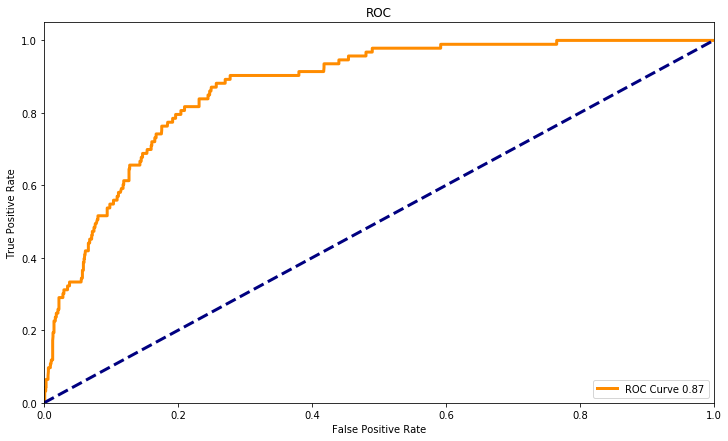

In [37]:
# Plot 
plt.figure(figsize = (12,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [38]:
ada_predict = gs.predict(X)
ada_proba = gs.predict_proba(X)[:,1]

In [39]:
ada_proba

array([0.38677781, 0.38470932, 0.38859826, ..., 0.48907579, 0.48907579,
       0.48907579])

In [40]:
submissions = pd.DataFrame(ada_predict, columns = ['wnvpresent'])
submissions['predproba'] = ada_proba
submissions.loc[:, 'wnvpresent']= submissions['predproba'].map(
    lambda p: 1 if p > .499999
    else 0)

In [41]:
submissions.wnvpresent.value_counts()

0    105001
1     11292
Name: wnvpresent, dtype: int64

In [42]:
X.shape

(116293, 47)

In [43]:
submissions['id'] = [id +1 for id in range(len(submissions))]

In [44]:
submissions = submissions[['id','wnvpresent' ]]


In [45]:
submissions.to_csv('./data/submission.csv', index = False)